In [1]:
import os

In [2]:
import os
import numpy as np
# import PIL.Image
# import dnnlib
# import dnnlib.tflib as tflib
# import pretrained_networks

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

In [4]:
df_labels = np.load('../paper2/kens_labels_latent_dataframe.pkl',allow_pickle=True) # Actually a pandas dataframe, but this works :-)

In [5]:
df_labels

Real key (filename) Real / fake  Real/Classifier Grade      Name    Grade  \
0        seed000023.png           f                    NaN  169.tiff     G4FG   
1         seed00006.png           f                    NaN  192.tiff  Healthy   
2         seed00022.png           f                    NaN  207.tiff  Healthy   
3         seed00023.png           f                    NaN  209.tiff     G4FG   
4         seed00024.png           f                    NaN  134.tiff       G3   
..                  ...         ...                    ...       ...      ...   
155      seed09226_.png           f                    NaN  077.tiff       G3   
156      seed092920.png           f                    NaN  233.tiff       G3   
157      seed093918.png           f                    NaN  060.tiff  Healthy   
158      seed096192.png           f                    NaN  159.tiff     G4FG   
159      seed096212.png           f                    NaN  080.tiff       G3   

      Realism Unnamed: 6  seed_num  \
0           3        NaN        23   
1           4        NaN         6   
2           3        NaN        22   
3           3        NaN        23   
4    5 (fake)        NaN        24   
..        ...        ...       ...   
155         2        NaN      9226   
156  1 (real)        NaN     92920   
157  1 (real)        NaN     93918   
158         4        NaN     96192   
159         4        NaN     96212   

                                        latent_np_path  \
0    /data/yoder_lab/output/100k_fakes/fakes-256-re...   
1    /data/yoder_lab/output/100k_fakes/fakes-256-re...   
2    /data/yoder_lab/output/100k_fakes/fakes-256-re...   
3    /data/yoder_lab/output/100k_fakes/fakes-256-re...   
4    /data/yoder_lab/output/100k_fakes/fakes-256-re...   
..                                                 ...   
155  /data/yoder_lab/output/100k_fakes/fakes-256-re...   
156  /data/yoder_lab/output/100k_fakes/00004-genera...   
157  /data/yoder_lab/output/100k_fakes/00004-genera...   
158  /data/yoder_lab/output/100k_fakes/00004-genera...   
159  /data/yoder_lab/output/100k_fakes/00004-genera...   

                                              w_latent  
0    [[[-0.017217465, -0.23587412, 1.3907448, -0.03...  
1    [[[-0.16149193, -0.1712764, 0.6612302, -0.1413...  
2    [[[-0.29150748, -0.03752208, -0.017261567, 0.3...  
3    [[[-0.017217465, -0.23587412, 1.3907448, -0.03...  
4    [[[-0.19505608, 1.1806426, -0.4056583, 0.22059...  
..                                                 ...  
155  [[[-0.1754206, -0.3447233, 0.8730533, 0.423190...  
156  [[[-0.35021698, -0.045471337, 0.25583082, 1.15...  
157  [[[-0.18941103, 0.870386, 0.7719372, -0.026669...  
158  [[[-0.014985866, -0.11959993, -0.14970206, -0....  
159  [[[-0.22109444, -0.18654014, -0.17416672, -0.0...  

[160 rows x 10 columns]

In [6]:
#def category_std(df, df_cat_col, cat_to_match, cat_to_mean):
cat_to_match = 'G3'
df_cat_col = 'Grade'
cat_to_mean = 'w_latent'
df = df_labels
print('std',cat_to_match)
cats = df.loc[df[df_cat_col] == cat_to_match]
data = np.zeros((cats.shape[0],cats[cat_to_mean].iloc[0][0,0].shape[0]))
for i in range(cats.shape[0]):
    point = cats[cat_to_mean].iloc[i][0,0]
    data[i,:] = point
data

std G3


array([[-0.19505608,  1.1806426 , -0.4056583 , ..., -0.214323  ,
         0.139557  , -0.26537687],
       [-0.2714954 , -0.34542927,  0.30734992, ..., -0.22149652,
        -0.18422918, -0.47737497],
       [-0.0804908 , -0.07771178, -0.06376626, ..., -0.08033389,
         0.36971602, -0.20769654],
       ...,
       [-0.1754206 , -0.34472331,  0.87305331, ..., -0.16031906,
        -0.11141855, -0.05006944],
       [-0.35021698, -0.04547134,  0.25583082, ...,  0.04964785,
        -0.22217673, -0.23206347],
       [-0.22109444, -0.18654014, -0.17416672, ..., -0.0819116 ,
         0.35260659, -0.24829686]])

In [7]:
psi = 0.6
std = psi*np.std(data,axis=0)
mean = np.mean(data,axis=0)
cov = psi**2*np.cov(data,rowvar=False,bias=True) 
# After much thought on this subject (https://stats.stackexchange.com/a/529891/80385), I've decided to use biased estimates since they tend to have a smaller variance which is probably good in our context.
# In fact, I think I'll use a "psi" factor on these!
new_points = np.random.multivariate_normal(mean,cov,size=10)

In [8]:
cov.shape

(512, 512)

In [9]:
mean.shape

(512,)

In [10]:
std.shape

(512,)

In [11]:
np.diag(cov)[0:10] - std[0:10]**2

array([ 0.00000000e+00,  1.38777878e-17,  0.00000000e+00,  0.00000000e+00,
       -6.93889390e-18,  0.00000000e+00, -8.67361738e-19,  0.00000000e+00,
        3.46944695e-18,  0.00000000e+00])

In [12]:
new_points.shape

(10, 512)

In [13]:
new_points[:,0:5].mean(axis=0)

array([ 0.03455036, -0.05970164,  0.0031472 ,  0.63117079,  0.01346709])

In [14]:
data[:,0:5].mean(axis=0)

array([-0.00538647, -0.10789699,  0.09979913,  0.59319483,  0.03002145])

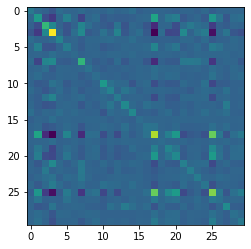

In [15]:
plt.imshow(np.cov(data.T)[0:30,0:30])

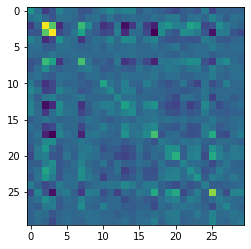

In [16]:
plt.imshow(np.cov(new_points.T)[0:30,0:30])

In [17]:
new_points.shape

(10, 512)

In [18]:
data.shape

(34, 512)

In [19]:
# np.save('new_points_G3.npy',new_points)

In [20]:
cats

Real key (filename) Real / fake  Real/Classifier Grade      Name Grade  \
4         seed00024.png           f                    NaN  134.tiff    G3   
6         seed00032.png           f                    NaN  200.tiff    G3   
16        seed00113.png           f                    NaN  094.tiff    G3   
18        seed00115.png           f                    NaN  197.tiff    G3   
21        seed00123.png           f                    NaN  217.tiff    G3   
24        seed00131.png           f                    NaN  215.tiff    G3   
43        seed00285.png           f                    NaN  160.tiff    G3   
47       seed003754.png           f                    NaN  194.tiff    G3   
49       seed003782.png           f                    NaN  029.tiff    G3   
52        seed00740.png           f                    NaN  120.tiff    G3   
58        seed01002.png           f                    NaN  164.tiff    G3   
61        seed01009.png           f                    NaN  140.tiff    G3   
71        seed01031.png           f                    NaN  189.tiff    G3   
75        seed01036.png           f                    NaN  245.tiff    G3   
93       seed020061.png           f                    NaN  250.tiff    G3   
94       seed020136.png           f                    NaN  002.tiff    G3   
99       seed020624.png           f                    NaN  238.tiff    G3   
102      seed020886.png           f                    NaN  103.tiff    G3   
103      seed021018.png           f                    NaN  028.tiff    G3   
106      seed021908.png           f                    NaN  216.tiff    G3   
107      seed022370.png           f                    NaN  014.tiff    G3   
116       seed03672.png           f                    NaN  166.tiff    G3   
128      seed054511.png           f                    NaN  226.tiff    G3   
130      seed054584.png           f                    NaN  228.tiff    G3   
134      seed054751.png           f                    NaN  171.tiff    G3   
139      seed054962.png           f                    NaN  231.tiff    G3   
142      seed054994.png           f                    NaN  202.tiff    G3   
144      seed055384.png           f                    NaN  079.tiff    G3   
146      seed06975_.png           f                    NaN  186.tiff    G3   
147      seed07377_.png           f                    NaN  237.tiff    G3   
152       seed08335.png           f                    NaN  235.tiff    G3   
155      seed09226_.png           f                    NaN  077.tiff    G3   
156      seed092920.png           f                    NaN  233.tiff    G3   
159      seed096212.png           f                    NaN  080.tiff    G3   

      Realism Unnamed: 6  seed_num  \
4    5 (fake)        NaN        24   
6           2        NaN        32   
16          4        NaN       113   
18          4        NaN       115   
21   5 (fake)        NaN       123   
24          4        NaN       131   
43          2        NaN       285   
47          4        NaN      3754   
49   1 (real)        NaN      3782   
52          2        NaN       740   
58   5 (fake)        NaN      1002   
61          3        NaN      1009   
71          2        NaN      1031   
75          2        NaN      1036   
93   1 (real)        NaN     20061   
94          3        NaN     20136   
99          4        NaN     20624   
102  5 (fake)        NaN     20886   
103         2        NaN     21018   
106         3        NaN     21908   
107         2        NaN     22370   
116         4        NaN      3672   
128         2        NaN     54511   
130         2        NaN     54584   
134         4        NaN     54751   
139         3        NaN     54962   
142  5 (fake)        NaN     54994   
144  5 (fake)        NaN     55384   
146         4        NaN      6975   
147         4        NaN      7377   
152         3        NaN      8335   
155         2        NaN      9226   
156  1 (real)      

In [21]:
categories = df_labels['Grade'].unique()

In [22]:
print(categories)

['G4FG' 'Healthy' 'G3' 'Atrophy' 'HGPIN']


In [54]:
means = {}
covs = {}
datas = {}
for cat_to_match in categories:
    print('Working on:',cat_to_match)
    df_cat_col = 'Grade'
    cat_to_mean = 'w_latent'
    df = df_labels
    cats = df.loc[df[df_cat_col] == cat_to_match]
    data = np.zeros((cats.shape[0],cats[cat_to_mean].iloc[0][0,0].shape[0]))
    for i in range(cats.shape[0]):
        point = cats[cat_to_mean].iloc[i][0,0]
        data[i,:] = point
    data
    
    psi = 0.6
    std = psi*np.std(data,axis=0)
    mean = np.mean(data,axis=0)
    cov = psi**2*np.cov(data,rowvar=False,bias=True) 
    means[cat_to_match] = mean
    covs[cat_to_match] = cov
    datas[cat_to_match] = data
    # After much thought on this subject (https://stats.stackexchange.com/a/529891/80385), I've decided to use biased estimates since they tend to have a smaller variance which is probably good in our context.
    # In fact, I think I'll use a "psi" factor on these!
    np.diag(cov)[0:10]
    new_points = np.random.multivariate_normal(mean,cov,size=1000)
    filename = 'Mike_points_'+cat_to_match+'.npy'
    print('Saving:',filename)
    np.save(filename,new_points)

Working on: G4FG
Saving: Mike_points_G4FG.npy
Working on: Healthy
Saving: Mike_points_Healthy.npy
Working on: G3
Saving: Mike_points_G3.npy
Working on: Atrophy
Saving: Mike_points_Atrophy.npy
Working on: HGPIN
Saving: Mike_points_HGPIN.npy


In [24]:
new_points[0,:]-new_points[1,:]

array([ 4.48704127e-02,  7.13715491e-02,  5.72419082e-02,  1.59718276e-01,
       -4.24087446e-03,  1.21173932e-01,  4.44081223e-03,  1.15348657e-01,
        1.99482738e-01, -5.00153605e-05, -2.30157654e-01, -1.40513027e-01,
        1.11987951e-01, -1.35357447e-01,  3.18683535e-03,  1.46791373e-01,
        4.36035454e-02, -5.35389855e-02,  1.38030497e-01, -2.58198570e-02,
        8.13823085e-02,  1.37715955e-01,  1.95870879e-01, -5.52394243e-02,
       -4.97206825e-02, -3.77445427e-01, -9.40786335e-02,  2.67433968e-01,
        1.28120153e-01, -4.45785429e-01,  7.11731987e-02,  3.93791511e-02,
        6.15014946e-02,  2.56046469e-01,  2.26055801e-01,  3.03233116e-01,
        4.91301063e-02, -3.54542784e-02, -5.46527648e-02,  8.13353538e-01,
        5.17067032e-01,  1.36832588e-01,  1.02638935e-01, -4.28235323e-02,
        6.57100133e-02,  3.40112241e-03, -1.67465235e-01,  6.91868814e-02,
        2.72392587e-02, -1.85809838e-01, -2.04601594e-02, -2.03227259e-03,
       -1.94362920e-01,  

In [25]:
(means['G4FG']-means['G3']) @ np.linalg.inv(covs['G4FG']+covs['G3']) @ (means['G4FG']-means['G3'])

-2.2830070693094e+16

In [26]:
C = covs['G3']#covs['G4FG']+covs['G3']

In [27]:
w,v = np.linalg.eigh(C) #Eigenvalues of a symmatric matrix C. 
# (In eigh, h stands for Hermition, a generalization of symmetric to complex numbers)

In [28]:
w.shape

(512,)

In [29]:
v.shape

(512, 512)

See https://en.wikipedia.org/wiki/Principal_component_analysis#Find_the_eigenvectors_and_eigenvalues_of_the_covariance_matrix

In [30]:
np.linalg.inv(v).T - v # Since C is symetric, we can use v.T for inv(v)  # Again, all elements should be below roughly 1e-14

array([[-5.27357042e-18, -2.60826305e-17,  2.33357912e-17, ...,
         9.54097912e-17,  5.89805982e-17,  2.37440276e-17],
       [ 3.60822483e-16,  2.22044605e-16,  8.32667268e-17, ...,
        -2.63677968e-16,  3.81639165e-16, -3.67761377e-16],
       [ 1.47104551e-15, -5.55111512e-17, -4.85722573e-16, ...,
         2.49800181e-16, -3.60822483e-16,  3.74700271e-16],
       ...,
       [-2.98372438e-16,  4.33680869e-18,  9.19403442e-17, ...,
         1.80411242e-16,  1.66533454e-16, -2.13370988e-16],
       [ 1.20563282e-16, -1.07552856e-16, -1.73472348e-18, ...,
         1.72388145e-16,  1.25767452e-16, -2.94902991e-17],
       [ 5.36137974e-17,  2.63677968e-16, -8.50014503e-17, ...,
         8.32667268e-17,  2.35922393e-16,  1.85615412e-16]])

In [31]:
((v@np.diag(w)@v.T)-C)[0:4,0:4] # Should be all < 1e-14. Shows V^-1 * W * V = Cov

array([[ 1.73472348e-17, -3.46944695e-18,  1.04083409e-16,
         1.28369537e-16],
       [-3.46944695e-18, -1.24900090e-16,  5.20417043e-17,
        -5.48172618e-16],
       [ 1.04083409e-16,  5.20417043e-17, -6.52256027e-16,
        -4.51028104e-16],
       [ 1.28369537e-16, -5.48172618e-16, -4.51028104e-16,
        -5.55111512e-17]])

In [32]:
v = np.fliplr(v)
w = np.flip(w)

In [33]:
((v@np.diag(w)@v.T)-C)[0:4,0:4]

array([[ 1.73472348e-17, -3.90312782e-18,  1.01481323e-16,
         1.31838984e-16],
       [-2.60208521e-18, -1.38777878e-16,  7.28583860e-17,
        -5.55111512e-16],
       [ 1.02348685e-16,  6.59194921e-17, -6.38378239e-16,
        -4.44089210e-16],
       [ 1.28369537e-16, -5.55111512e-16, -4.51028104e-16,
        -5.55111512e-17]])

In [34]:
keepdims = w > 1e-14
keepdims[keepdims].shape

(33,)

Now we have a lower-dimensional decomposition of V:

In [35]:
((v[:,keepdims]@np.diag(w[keepdims])@(v.T)[keepdims,:])-C)[0:4,0:4]

array([[ 3.12250226e-17, -3.90312782e-18,  1.01481323e-16,
         1.28369537e-16],
       [-3.90312782e-18, -6.93889390e-17,  1.35308431e-16,
        -2.77555756e-16],
       [ 1.03216047e-16,  1.31838984e-16, -4.99600361e-16,
        -2.77555756e-16],
       [ 1.28369537e-16, -2.77555756e-16, -2.84494650e-16,
        -3.88578059e-16]])

In [36]:
pca_space = datas['G3'] @ v[:,keepdims] @ np.linalg.inv(np.diag(np.sqrt(w[keepdims])))

In [37]:
np.cov(pca_space.T) # Why is the diagonal a constant 2.86 instead of a constant 1?

array([[ 2.86195286e+00,  2.23881212e-16,  1.36047900e-15, ...,
        -6.88903617e-16,  1.97287557e-15, -4.75248654e-15],
       [ 2.23881212e-16,  2.86195286e+00,  7.43566966e-16, ...,
         3.33432865e-16,  4.44755092e-16,  3.91360528e-15],
       [ 1.36047900e-15,  7.43566966e-16,  2.86195286e+00, ...,
         8.28622932e-16, -4.33880434e-17,  2.70495773e-16],
       ...,
       [-6.88903617e-16,  3.33432865e-16,  8.28622932e-16, ...,
         2.86195286e+00, -2.26123879e-16, -1.28989248e-15],
       [ 1.97287557e-15,  4.44755092e-16, -4.33880434e-17, ...,
        -2.26123879e-16,  2.86195286e+00,  1.06892707e-15],
       [-4.75248654e-15,  3.91360528e-15,  2.70495773e-16, ...,
        -1.28989248e-15,  1.06892707e-15,  2.86195286e+00]])

In [38]:
np.sqrt(w[keepdims])

array([2.94924636, 1.48565154, 1.37777017, 1.23033422, 1.08813321,
       0.97936335, 0.96158884, 0.91550976, 0.89053048, 0.81169654,
       0.77760481, 0.76149739, 0.73361528, 0.69422406, 0.68596197,
       0.66983972, 0.65328891, 0.6258313 , 0.6121267 , 0.59181529,
       0.57031131, 0.55672439, 0.54520717, 0.52336026, 0.51616655,
       0.49800248, 0.47641352, 0.45691242, 0.44854154, 0.43325495,
       0.40724771, 0.39500643, 0.35472916])

In [39]:
plt.imshow(np.cov(pca_space.T))

Now we can find the within-subspace Mahalanobis distance:  (We have not followed the normalize step)

See https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdf/10.1002/cem.2692

In [40]:
# To compare points in two subspaces, let's consider the covariance of both:
C = covs['G4FG']+covs['G3']
w,v = np.linalg.eigh(C)
v = np.fliplr(v)
w = np.flip(w)
keepdims = w > 1e-14
keepdims[keepdims].shape

(53,)

In [41]:
# w # Check that the 1e-14 threshold is still valid. It was.

In [42]:
pca_space_g3_mean = (means['G3']-(means['G3']+means['G4FG'])/2) @ v[:,keepdims] @ np.linalg.inv(np.diag(np.sqrt(w[keepdims])))
pca_space_g4fg_mean = (means['G4FG']-(means['G3']+means['G4FG'])/2) @ v[:,keepdims] @ np.linalg.inv(np.diag(np.sqrt(w[keepdims])))
pca_space_g3 = (datas['G3']-(means['G3']+means['G4FG'])/2) @ v[:,keepdims] @ np.linalg.inv(np.diag(np.sqrt(w[keepdims])))
pca_space_g4fg = (datas['G4FG']-(means['G3']+means['G4FG'])/2) @ v[:,keepdims] @ np.linalg.inv(np.diag(np.sqrt(w[keepdims])))

In [43]:
pca_space_diff = pca_space_g3_mean - pca_space_g4fg_mean
pca_space_diff

array([-0.21493512,  0.4902168 , -0.27022872,  0.32238805, -0.13708362,
       -0.24993653,  0.14119913, -0.58784224,  0.20187749,  0.16892105,
        0.10860397, -0.59662078, -0.36970623, -0.30229076, -0.13254818,
        0.32773101,  0.52296587,  0.15231711, -0.02682163,  0.13574612,
       -0.08776578,  0.21126773,  0.12933768,  0.00586309, -0.07034596,
       -0.2552234 , -0.07491158, -0.14134857, -0.18619086, -0.14098981,
        0.29133526, -0.11915661,  0.04869409, -0.7454824 ,  0.03916611,
        0.37833343,  0.10740221, -0.43760583, -0.03536178,  0.06270167,
       -0.07200896, -0.00792019, -0.1352971 ,  0.15064922, -0.57789621,
        0.19614537, -0.40181113, -0.07149981,  0.64717607, -0.15215789,
       -0.0912893 , -0.22912613, -0.21099106])

In [44]:
pca_space_g4fg.mean(axis=0) - pca_space_g4fg_mean # Should be nearly zero. Confirmed for both G3 and g4

array([-8.32667268e-17,  2.77555756e-17, -2.49800181e-16, -8.32667268e-17,
       -4.16333634e-17, -4.16333634e-17, -1.52655666e-16, -1.66533454e-16,
        1.38777878e-17,  4.16333634e-17, -3.46944695e-17,  1.11022302e-16,
       -2.77555756e-17, -8.32667268e-17, -1.11022302e-16,  8.32667268e-17,
        0.00000000e+00,  9.71445147e-17,  1.02348685e-16,  5.55111512e-17,
        2.08166817e-17, -1.38777878e-17,  5.55111512e-17, -1.64798730e-16,
        9.02056208e-17,  2.77555756e-17,  1.38777878e-16, -4.16333634e-17,
        1.38777878e-16, -4.16333634e-17, -5.55111512e-17, -2.01227923e-16,
       -4.51028104e-17, -5.55111512e-17, -1.24900090e-16, -2.77555756e-17,
       -1.17961196e-16,  1.11022302e-16, -6.24500451e-17, -2.77555756e-17,
        2.56739074e-16, -7.02563008e-17,  1.38777878e-17, -6.93889390e-17,
        5.55111512e-17, -1.11022302e-16,  8.32667268e-17,  2.35922393e-16,
       -5.55111512e-17, -1.80411242e-16,  6.93889390e-18, -5.55111512e-17,
        3.60822483e-16])

In [45]:
sum(pca_space_diff * pca_space_diff)

4.378130213717679

In [46]:
pca_space_diff

array([-0.21493512,  0.4902168 , -0.27022872,  0.32238805, -0.13708362,
       -0.24993653,  0.14119913, -0.58784224,  0.20187749,  0.16892105,
        0.10860397, -0.59662078, -0.36970623, -0.30229076, -0.13254818,
        0.32773101,  0.52296587,  0.15231711, -0.02682163,  0.13574612,
       -0.08776578,  0.21126773,  0.12933768,  0.00586309, -0.07034596,
       -0.2552234 , -0.07491158, -0.14134857, -0.18619086, -0.14098981,
        0.29133526, -0.11915661,  0.04869409, -0.7454824 ,  0.03916611,
        0.37833343,  0.10740221, -0.43760583, -0.03536178,  0.06270167,
       -0.07200896, -0.00792019, -0.1352971 ,  0.15064922, -0.57789621,
        0.19614537, -0.40181113, -0.07149981,  0.64717607, -0.15215789,
       -0.0912893 , -0.22912613, -0.21099106])

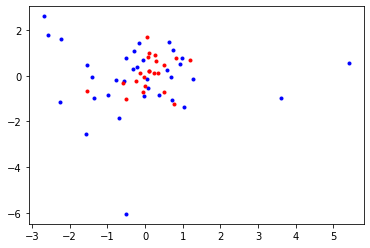

In [47]:
plt.plot(pca_space_g3[:,-1],pca_space_g3[:,-2],'b.')
plt.plot(pca_space_g4fg[:,-1],pca_space_g4fg[:,-2],'r.')

In [48]:
plt.plot(pca_space_g3[:,7],pca_space_g3[:,-5],'b.')
plt.plot(pca_space_g4fg[:,7],pca_space_g4fg[:,-5],'r.')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


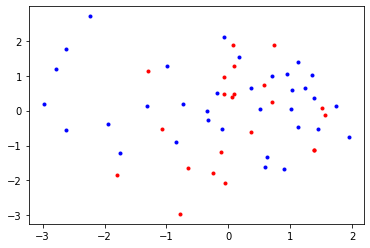

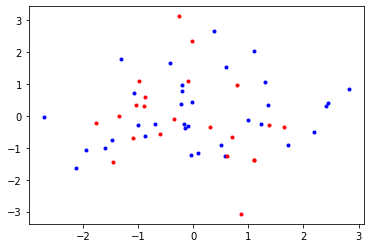

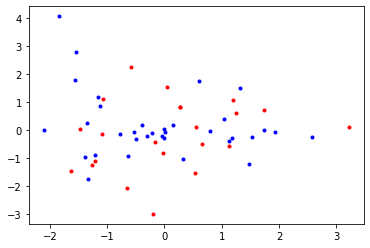

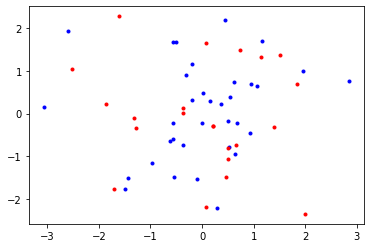

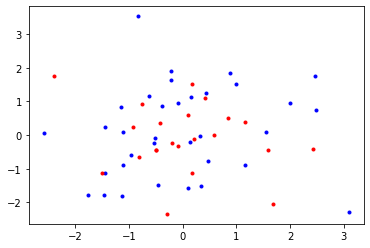

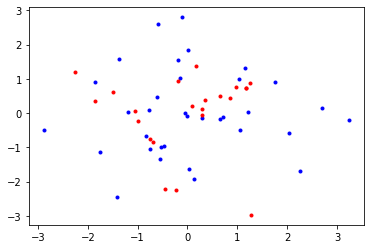

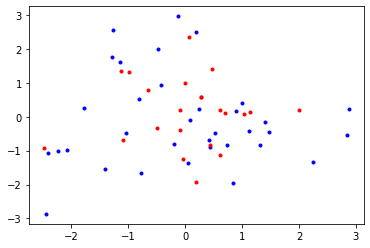

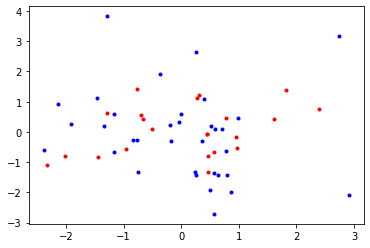

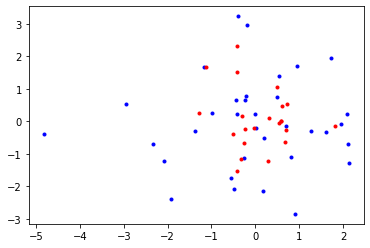

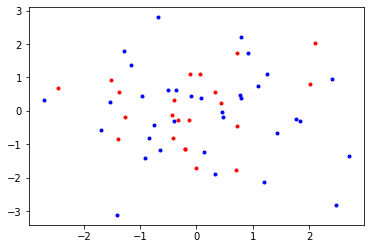

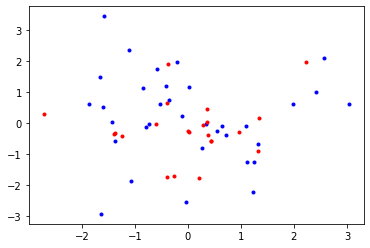

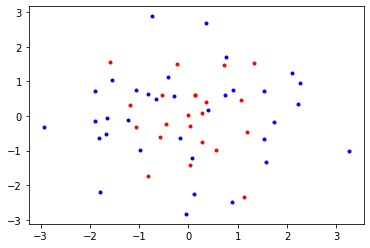

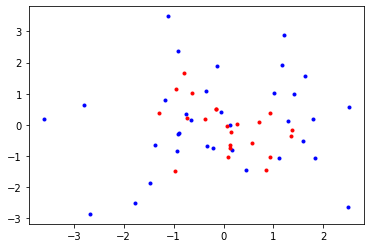

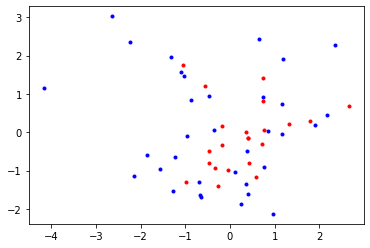

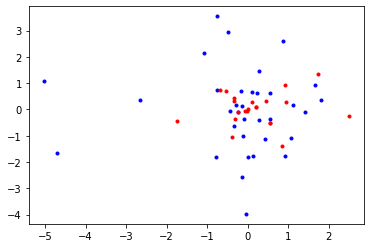

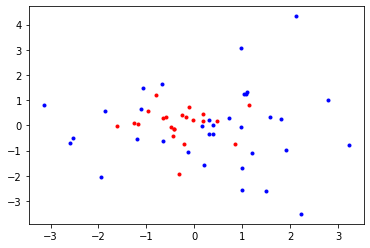

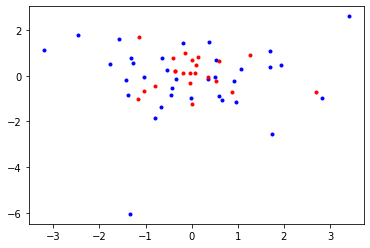

In [49]:
for i in range(0,pca_space_g3.shape[1]-1,2):
    plt.figure()
    plt.plot(pca_space_g3[:,i],pca_space_g3[:,i+1],'b.')
    plt.plot(pca_space_g4fg[:,i],pca_space_g4fg[:,i+1],'r.')

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(pca_space_g3[:,0],pca_space_g3[:,1],pca_space_g3[:,2],'b.')
ax.plot3D(pca_space_g4fg[:,0],pca_space_g4fg[:,1],pca_space_g4fg[:,2],'r.')

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [51]:
grade_std_dict = {}
for category in df_labels['Grade'].unique():
    grade_std_dict[category] = category_std(df_labels, 'Grade', category, 'w_latent')

NameError: name 'category_std' is not defined

In [52]:
grade_std_dict

{}

In [53]:
_G, _D, Gs = pretrained_networks.load_networks(network)

NameError: name 'pretrained_networks' is not defined

In [7]:
Gs_syn_kwargs = dnnlib.EasyDict()
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = False
Gs_syn_kwargs.minibatch_size = 1

In [8]:
def make_latents(Gs, seed=0, sigma = 1.0, mu = 0.0):
    # note: this makes the z latent
    latents =  sigma * np.random.RandomState(seed).randn(1, Gs.input_shape[1]) + mu
    return latents

In [9]:
images = Gs.run(make_latents(Gs), None, **synthesis_kwargs) # [seed, y, x, rgb]

NameError: name 'Gs' is not defined

In [10]:
images.shape

NameError: name 'images' is not defined

In [19]:
def plot_image(Gs_output):
    image = PIL.Image.fromarray(Gs_output[0], 'RGB')
    plt.imshow(image)

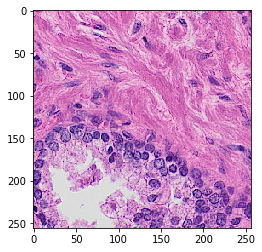

In [25]:
plot_image(images)

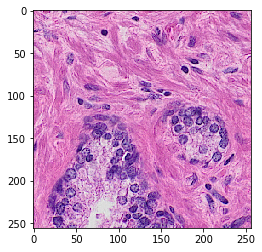

In [20]:
plot_image(images)

## Paper 2 - View Ken Means

In [29]:
# load means
import pickle as pkl
data = None
means_pkl = '/data/yoder_lab/paper2/w_mean_dict.pkl'
with open(means_pkl, "rb") as f:
    data = pkl.load(f)
print(data)

{'G4FG': array([[[ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        ...,
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011],
        [ 0.065469  , -0.17271864,  0.26025403, ..., -0.13037181,
         -0.11438315,  0.02508011]]], dtype=float32), 'Healthy': array([[[ 0.06075083, -0.03578991,  0.5443307 , ..., -0.06433798,
         -0.10113731, -0.07815652],
        [ 0.06075083, -0.03578991,  0.5443307 , ..., -0.06433798,
         -0.10113731, -0.07815652],
        [ 0.06075083, -0.03578991,  0.5443307 , ..., -0.06433798,
         -0.10113731, -0.07815652],
        ...,
        [ 0.060750

In [107]:
# load realism
import pickle as pkl
data_reals = None
realism_pkl = '/data/yoder_lab/paper2/realism_mean_dict.pkl'
with open(realism_pkl, "rb") as f:
    data_reals = pkl.load(f)
print(data_reals)

{'3': array([[[ 0.07214146, -0.1246835 ,  0.43296263, ..., -0.09497143,
         -0.06585144, -0.03430386],
        [ 0.07214146, -0.1246835 ,  0.43296263, ..., -0.09497143,
         -0.06585144, -0.03430386],
        [ 0.07214146, -0.1246835 ,  0.43296263, ..., -0.09497143,
         -0.06585144, -0.03430386],
        ...,
        [ 0.07214146, -0.1246835 ,  0.43296263, ..., -0.09497143,
         -0.06585144, -0.03430386],
        [ 0.07214146, -0.1246835 ,  0.43296263, ..., -0.09497143,
         -0.06585144, -0.03430386],
        [ 0.07214146, -0.1246835 ,  0.43296263, ..., -0.09497143,
         -0.06585144, -0.03430386]]], dtype=float32), '4': array([[[ 0.13422495, -0.02498317,  0.2629253 , ..., -0.08049654,
         -0.05417652, -0.02459597],
        [ 0.13422495, -0.02498317,  0.2629253 , ..., -0.08049654,
         -0.05417652, -0.02459597],
        [ 0.13422495, -0.02498317,  0.2629253 , ..., -0.08049654,
         -0.05417652, -0.02459597],
        ...,
        [ 0.13422495, -0.02

In [33]:
def generate_image_from_w(Gs, w_code):
    all_images = Gs.components.synthesis.run(w_code, **Gs_syn_kwargs)
    return all_images

In [35]:
print(data.keys())

dict_keys(['G4FG', 'Healthy', 'G3', 'Atrophy', 'HGPIN'])


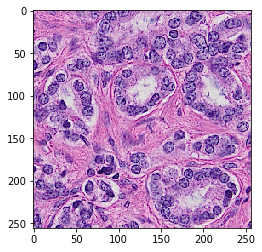

In [37]:
plot_image(generate_image_from_w(Gs, data['G4FG']))

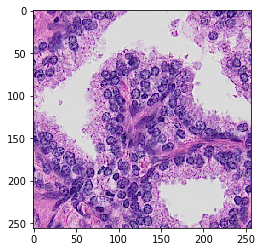

In [38]:
plot_image(generate_image_from_w(Gs, data['Healthy']))

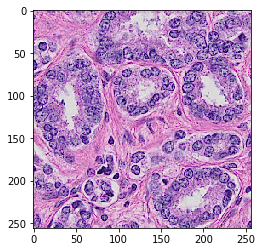

In [39]:
plot_image(generate_image_from_w(Gs, data['G3']))

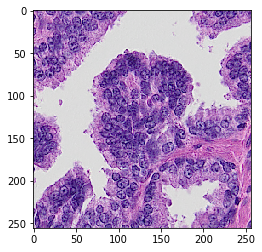

In [40]:
plot_image(generate_image_from_w(Gs, data['HGPIN']))

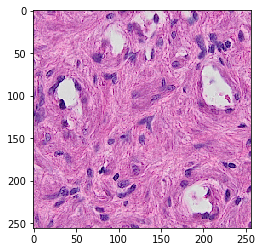

In [41]:
plot_image(generate_image_from_w(Gs, data['Atrophy']))

In [44]:
5 // 2

2

In [45]:
5 % 2

1

In [46]:
5 // 2

2

In [71]:
def view_latents(Gs, key_to_w_latent_map):
    total = len(key_to_w_latent_map.keys())
    print("Total Images to Plot: ", total)
    
    images = []
    
    for key in key_to_w_latent_map:
        w_code = key_to_w_latent_map[key]
        print("Generating image for: ", key)
        Gs_output = Gs.components.synthesis.run(w_code, **Gs_syn_kwargs)
        image = PIL.Image.fromarray(Gs_output[0], 'RGB')
        images.append(image)
    
    fig = plt.figure(figsize=(20,20))
    grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, (total // 2) + (total % 2)),
                 axes_pad=0.5,
                 )

    for ax, im, key in zip(grid, images, key_to_w_latent_map.keys()):
        # Iterating over the grid returns the Axes.
        ax.set_title(key)
        ax.imshow(im)      

    plt.show()

Total Images to Plot:  5
Generating image for:  G4FG
Generating image for:  Healthy
Generating image for:  G3
Generating image for:  Atrophy
Generating image for:  HGPIN


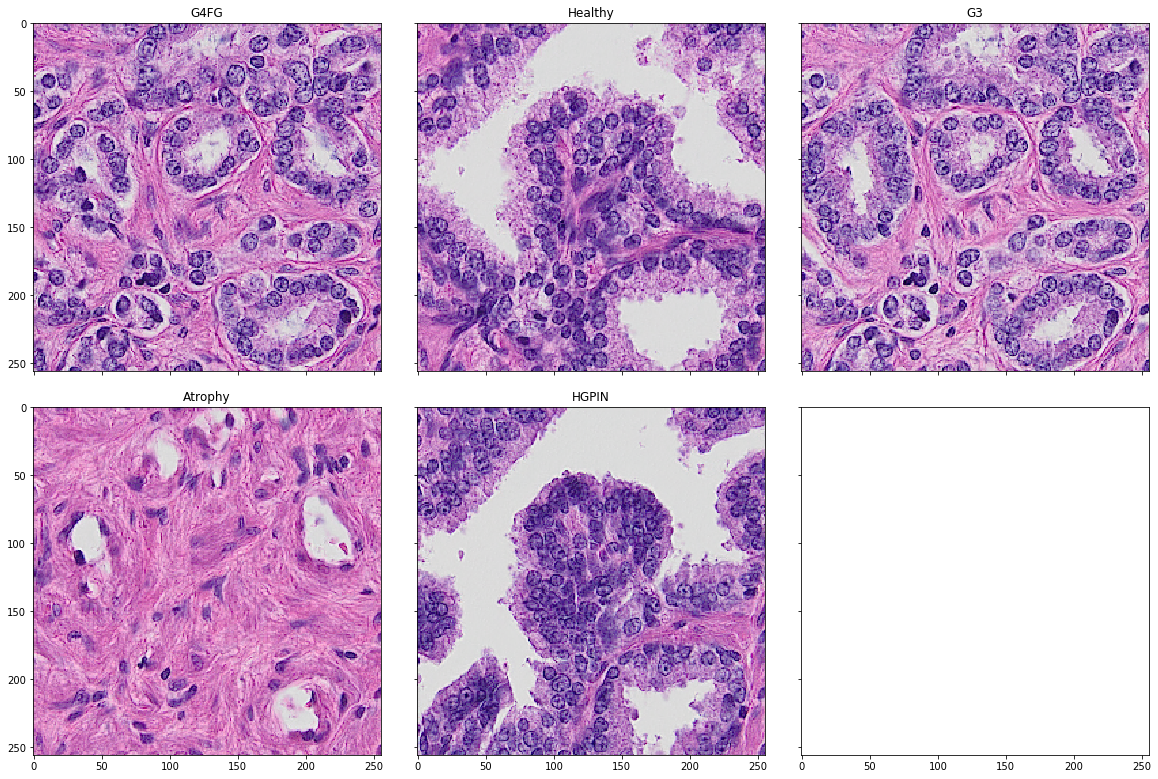

In [72]:
view_latents(Gs, data)

In [91]:
def compute_distance(w1, w2):
    dvec_ = w1 - w2
    dist = (dvec_**2).sum()
    return dist

In [109]:
side_length = len(data_reals.keys())
arr = np.zeros((side_length, side_length))

for index, cat1 in enumerate(data_reals.keys()):
    for index2, cat2 in enumerate(data_reals.keys()):
        dist = compute_distance(data_reals[cat1], data_reals[cat2])
        arr[index,index2]  = dist

print(data_reals.keys())
print(arr)

dict_keys(['3', '4', '5 (fake)', '2', '1 (real)'])
[[  0.          60.74195099 192.11495972  51.55659485 132.60046387]
 [ 60.74195099   0.          83.87226868  66.92942047 149.30236816]
 [192.11495972  83.87226868   0.         168.83859253 234.41622925]
 [ 51.55659485  66.92942047 168.83859253   0.         121.2023468 ]
 [132.60046387 149.30236816 234.41622925 121.2023468    0.        ]]


In [105]:
side_length = len(data.keys())
arr = np.zeros((side_length, side_length))

for index, cat1 in enumerate(data.keys()):
    for index2, cat2 in enumerate(data.keys()):
        dist = compute_distance(data[cat1], data[cat2])
        arr[index,index2]  = dist

print(data.keys())
print(arr)

dict_keys(['G4FG', 'Healthy', 'G3', 'Atrophy', 'HGPIN'])
[[  0.         289.75619507 102.21148682 522.89630127 478.63577271]
 [289.75619507   0.         180.48583984 332.83874512 240.82350159]
 [102.21148682 180.48583984   0.         388.59066772 328.67236328]
 [522.89630127 332.83874512 388.59066772   0.         362.00082397]
 [478.63577271 240.82350159 328.67236328 362.00082397   0.        ]]


In [92]:
compute_distance(data['G3'], data['G4FG'])

102.21149

In [93]:
compute_distance(data['Atrophy'], data['G4FG'])

522.8963

In [94]:
compute_distance(data['Atrophy'], data['HGPIN'])

362.00082

Total Images to Plot:  5
Generating image for:  3
Generating image for:  4
Generating image for:  5 (fake)
Generating image for:  2
Generating image for:  1 (real)


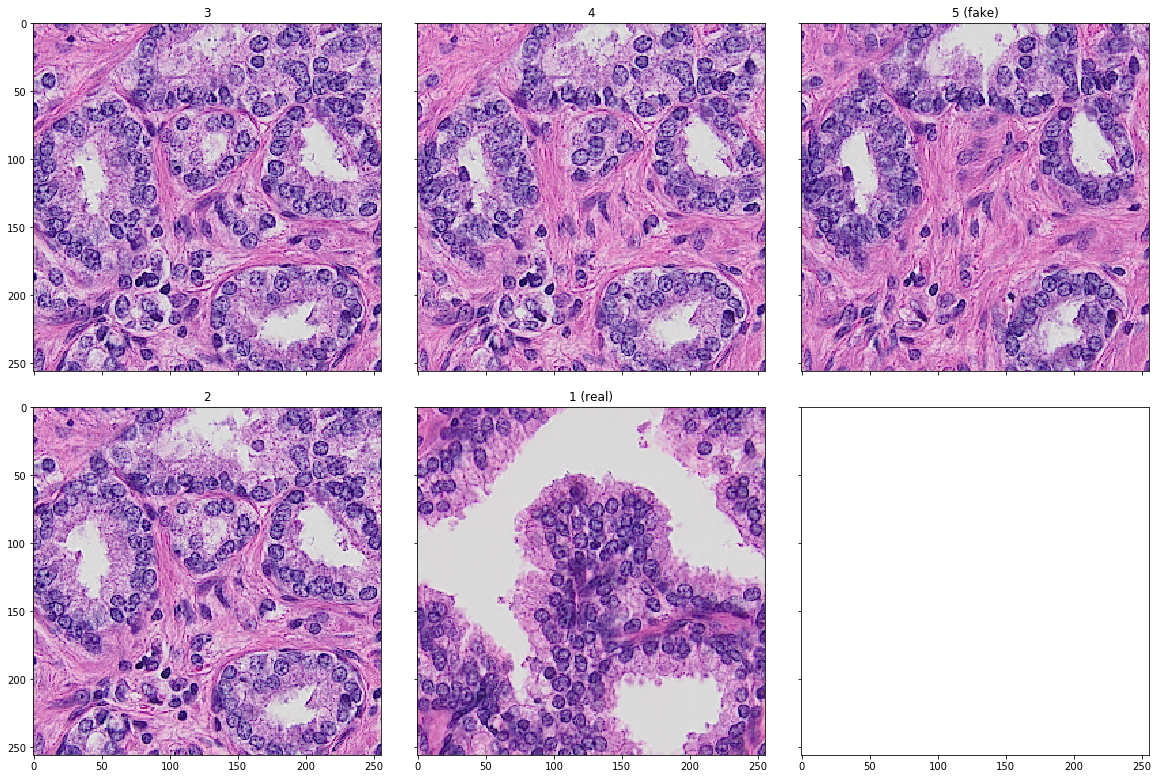

In [108]:
view_latents(Gs, data_reals)